In [1]:
!pip install kaggle


In [2]:
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
os.rename("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [3]:
!kaggle competitions download -c dogs-vs-cats


100% 811M/812M [00:04<00:00, 167MB/s]
100% 812M/812M [00:04<00:00, 183MB/s]


In [4]:
!kaggle competitions download -c dogs-vs-cats -f train.zip


 98% 535M/543M [00:03<00:00, 54.8MB/s]
100% 543M/543M [00:03<00:00, 165MB/s] 


In [5]:
import zipfile

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')


In [6]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing import image

In [7]:
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')

train_dir = 'train/train' if os.path.exists('train/train') else 'train'

In [26]:
img_size = 64  # smaller size for speed
data = []
labels = []

# Get image list & shuffle
img_list = os.listdir(train_dir)
np.random.shuffle(img_list)

max_images = 500
for img_name in img_list[:max_images]:
    img_path = os.path.join(train_dir, img_name)
    img = cv2.imread(img_path)  # Read in color by default
    if img is None:
        continue  # Skip corrupted/missing files

    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    label = 0 if 'cat' in img_name else 1  # Only append if image is valid
    data.append(img.flatten())
    labels.append(label)

X = np.array(data)
y = np.array(labels)
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


Data shape: (500, 12288)
Labels shape: (500,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [32]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        56
           1       0.69      0.45      0.55        44

    accuracy                           0.67       100
   macro avg       0.68      0.65      0.64       100
weighted avg       0.67      0.67      0.66       100



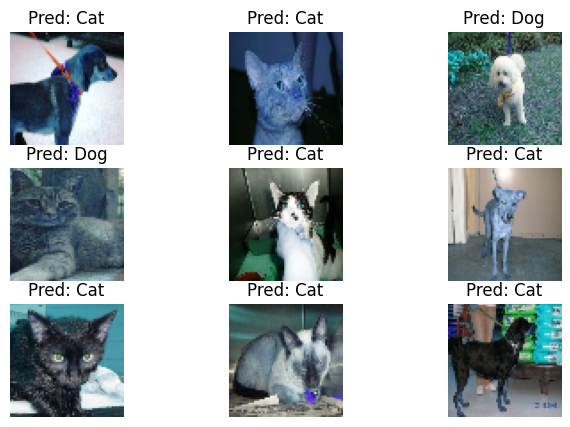

In [33]:
plt.figure(figsize=(8, 5))
for i in range(9):
    img = X_test[i].reshape(img_size, img_size,3)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title("Pred: " + ("Cat" if y_pred[i]==0 else "Dog"))
    plt.axis('off')
plt.show()

In [34]:
sample_path = os.path.join(train_dir, os.listdir(train_dir)[0])
test_img = cv2.imread(sample_path)  # Keep as RGB
test_img_resized = cv2.resize(test_img, (img_size, img_size))
test_img_normalized = test_img_resized / 255.0
test_img_flat = test_img_normalized.flatten().reshape(1, -1)

single_pred = svm_model.predict(test_img_flat)
print("Single Prediction:", "Cat" if single_pred[0] == 0 else "Dog")


Single Prediction: Dog
